In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor, ceil

In [3]:
def mnk(x, y):
    b = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
    a = np.mean(y) - b*np.mean(x)
    sb = 1/np.sqrt(len(x)) * np.sqrt((np.mean(y**2) - np.mean(y)**2)/(np.mean(x**2) - np.mean(x)**2) - b**2)
    sa = sb*np.sqrt(np.mean(x**2) - np.mean(x)**2)
    
    return a, b, sa, sb

def mnk_a0(x, y):
    b = np.mean(x*y)/np.mean(x**2)
    sb = 1/np.sqrt(len(x)) * np.sqrt((np.mean(y**2)/np.mean(x**2)) - b**2)
    
    return b, sb

def round_to_1(x):
    return round(x*10**-int(floor(log10(abs(x)))))/10**-int(floor(log10(abs(x))))

def science_notation(x, err):
    err = round_to_1(err)
    x = round(x, len(str(err))-2)
    return f'{str(x) + "0"*(len(str(err)) - len(str(x)))}±{err}', (str(x) + "0"*(len(str(err)) - len(str(x))), str(err))

# Получение g и I эксперементально

In [4]:
sL = sh = sr1 = sr2 = sl = 0.01/100
sm = sM = sm_pr = 0.5/1000

data = pd.read_csv('data/data.txt')
L = data['L'].values/100
T = data['T'].values
a = 30/100
m = 291/1000
M = 891.9/1000
m_pr = 78.2/1000
p = 27.36/100
l = 100/100
I_0 = M*l**2/12 + M*a**2


# data = pd.read_csv('data/data_n.txt')
# L = data['L'].values/100
# T = data['T'].values/100
# a = 25.5/100
# m = 291/1000
# M = 891.9/1000
# m_pr = 78.2/1000
# gamma = (M+m_pr)/m
# p = 23.22/100
# l = 100/100
# I_0 = M*l**2/12 + M*a**2

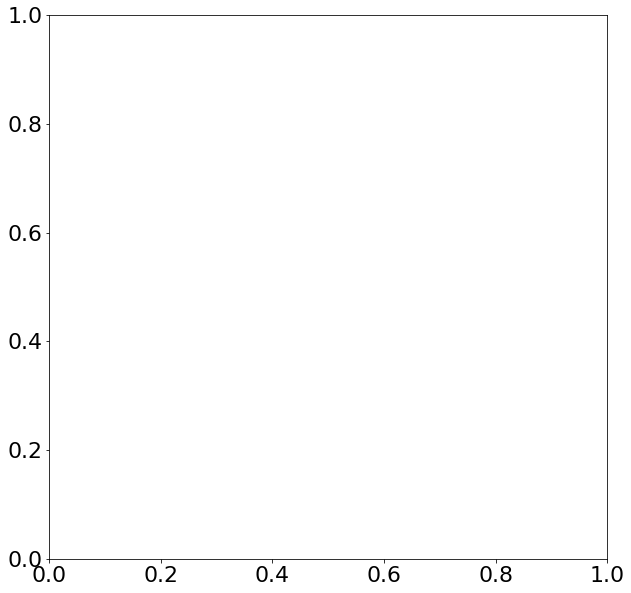

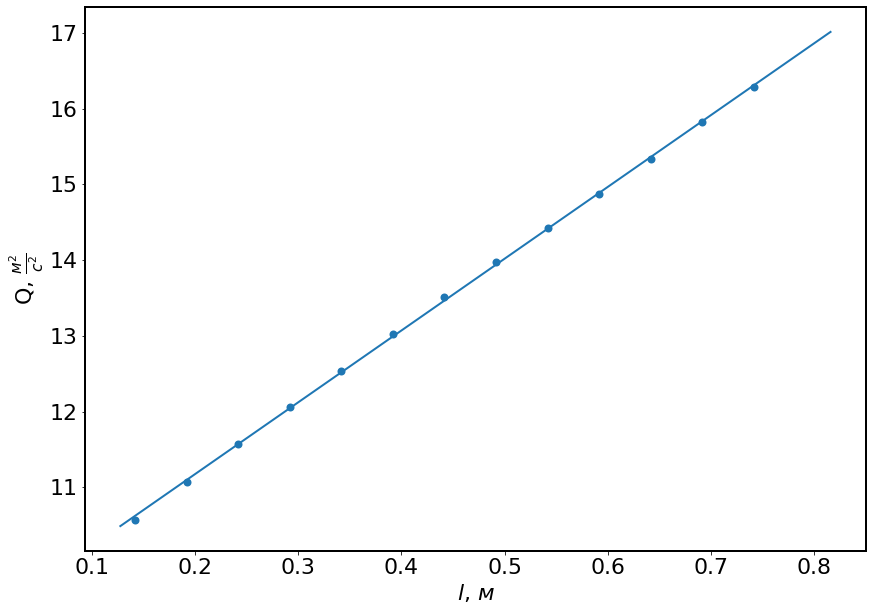

In [10]:
x = L - 1.66/200
y = (4*np.pi**2)/T**2 * (I_0/m + L**2)

fig, ax = plt.subplots(figsize=(10, 10))

plt.rc('font', size=22)

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.set_xlabel('$l$, $м$')
ax.set_ylabel(r'Q, $\frac{м^2}{с^2}$')
# ax.set_title(f'I(U)')

ax.scatter(x, y, linewidth=2)
a, b, sa, sb = mnk(x, y)

X = np.array([min(x)*0.9, max(x)*1.1])
Y = a + b*X
ax.plot(X, Y, linewidth=2)
# ax.legend(loc='upper left')

# ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle='None', ecolor='red')

In [11]:
fig.savefig(r'D:\LabProjects\1.4.1\report\images\gr1.eps', format='eps')

In [45]:
a, b, sa, sb
g = b
print(f'''Ускорение свободного падения: {science_notation(b, sb)[0]}, {round_to_1(sb/b*100)}%
Доп сила: {science_notation(a*m, sa*m)[0]}, {round_to_1(sa/a*100)}%''')

Ускорение свободного падения: 9.49±0.04, 0.5%
Доп сила: 2.699±0.002, 0.09%


# Расчёт момента инерции теоретически

In [7]:
h = 1.66/100
r_1 = 0.6/100
r_2 = 2.8/100
I_t = 1/12*m*(3*(r_1**2 + r_2**2) + h**2)
I_t

6.633732999999998e-05

In [8]:
I_pr = m_pr*(2/100)**2

In [9]:
I_t/I_0, I_pr/I_0

(0.0004291012057233045, 0.00020233382493725584)

In [23]:
I_pr

3.1280000000000005e-05

In [22]:
err_I_0/I_t, err_I_0/I_pr

(1.551706047259725, 3.290793993608182)

In [15]:
err_I_0 = np.sqrt((M*l/6*sL)**2 + (2*M*a*sl)**2 + ((l**2/12 + a**2)*sM)**2)
science_notation(I_0, err_I_0)[0]

'0.1546±0.0001'

In [34]:
sI = np.sqrt(err_I_0**2 + I_pr**2 + I_t**2)
sT = 0.5/1000

In [39]:
sjm = I_0/m * np.sqrt((0.0002/I_0)**2 + (sm/m)**2)
err = np.sqrt((2*sT/T*y)**2 + ((4*np.pi**2)/T**2*sjm)**2 + (2*L*(4*np.pi**2)/T**2*sl)**2)

In [48]:
sg_p = g*((max(err/y))**2 + (max(sl/L))**2)**0.5

In [51]:
(sg_p**2 + sb**2)**0.5

0.04817693851453824

In [54]:
0.05/9.49*100

0.5268703898840885